
<div>
<img src="https://i.ibb.co/v3CvVz9/udd-short.png" width="150"/>
    <br>
    <strong>Universidad del Desarrollo</strong><br>
    <em>Magíster en Data Science</em><br>
    <em>Profesor: Víctor Navarro Aránguiz</em><br>

</div>

# Python para Data Science: Proyecto final
*15 de Julio de 2024*

**Fecha de Entrega**: 04 de Agosto de 2024

**Objetivos:**
  - Aplicar los conceptos aprendidos en clases.
  - Realizar el análisis de un dataset de su preferencia.
  - Familiarizarse con el manejo de versiones a través de Git.

**Puntaje Total:** 6 Puntos

**Nombre Estudiante(s)**: `Giuseppe Lavarello`

### Limpieza de Datos
##### Importe de Paquetes

In [1]:
# Para manipulación de data 
import numpy as np
import pandas as pd

# Para visualización de data
from matplotlib import pyplot as plt
import seaborn as sns
import missingno as msno #de NaNs

# Para la normalizacion de la data
from sklearn.preprocessing import MinMaxScaler

##### Carga de Datos

In [2]:
# Como en el Análisis no cambiamos la data la podemos cargar de la misma manera

df0 = pd.read_csv("..\\data\\raw\\winequality-white.csv", sep=";")


##### Data Faltante

In [3]:
# checkeo de valores nulos
df0.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: >

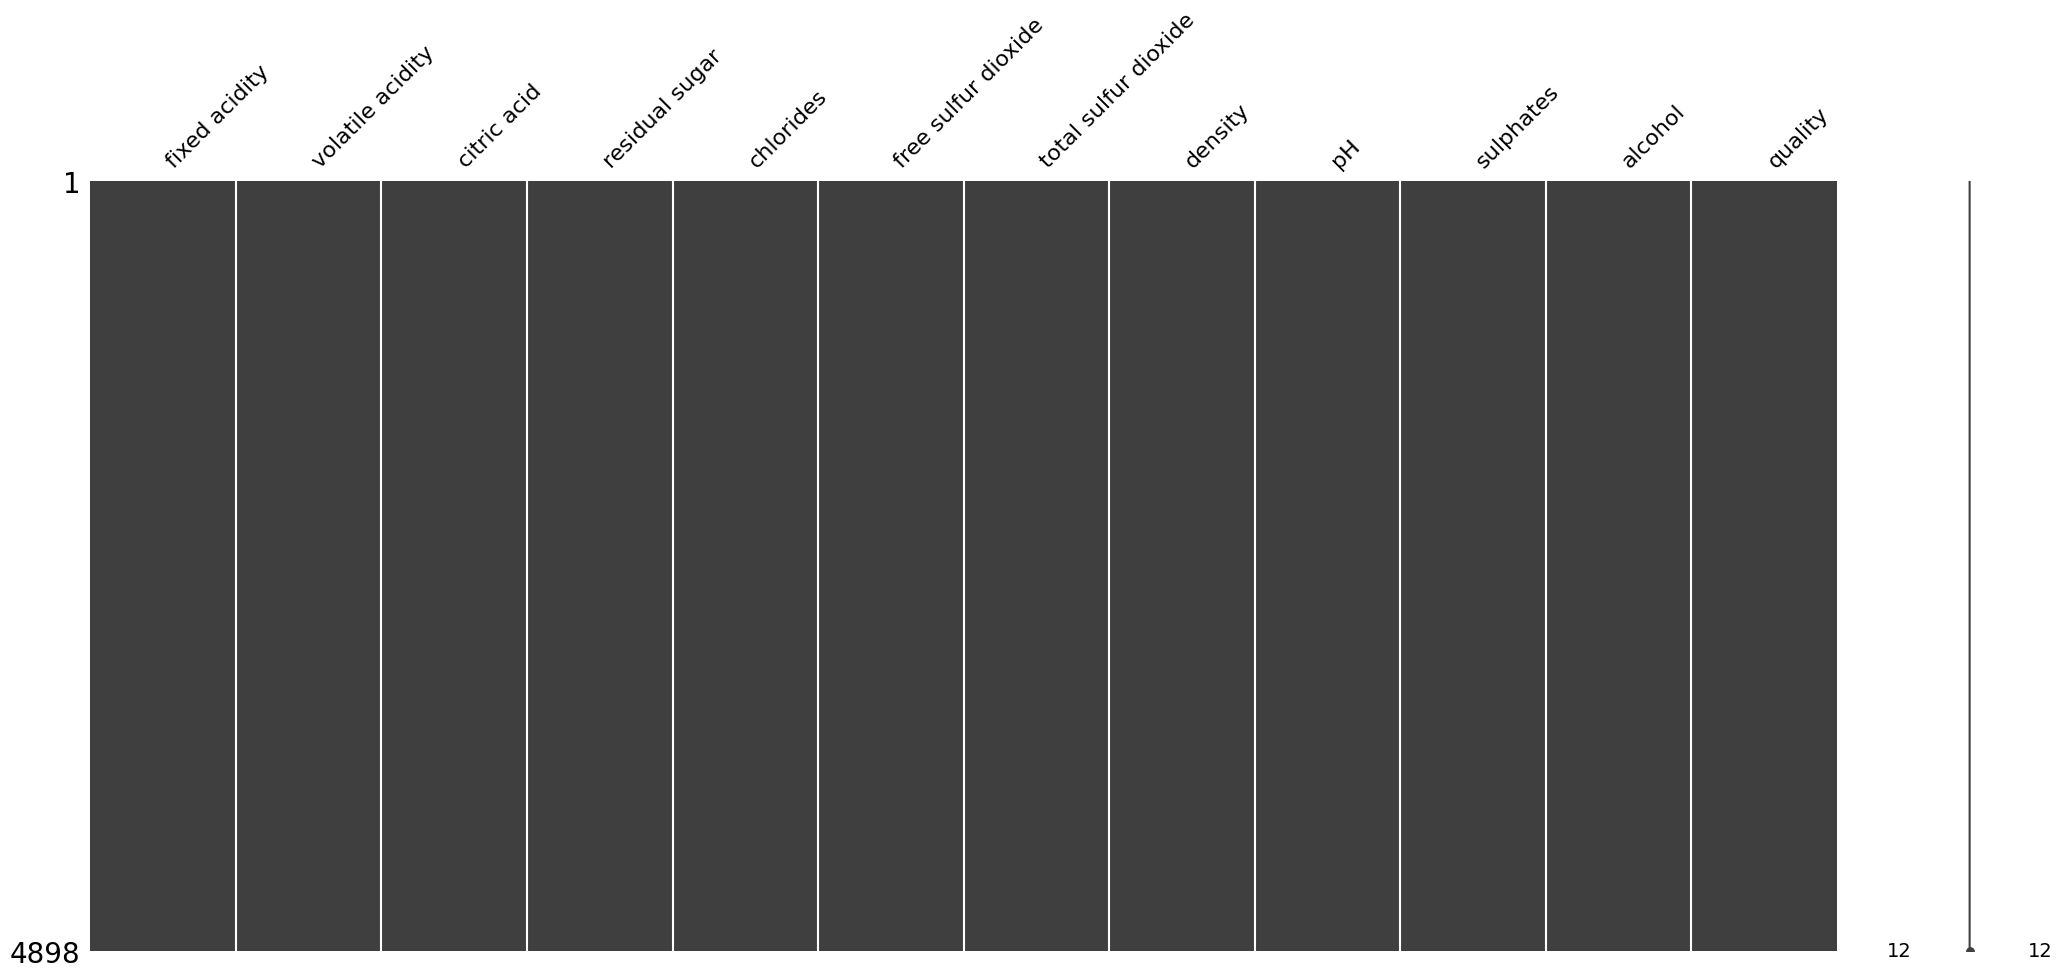

In [4]:
msno.matrix(df0)

##### Data Duplicada

In [5]:
# Checkeo de duplicados
duplicados = df0.duplicated().sum()

# Percentage of duplicated data
porcentaje = duplicados / df0.shape[0] * 100

print(f'{duplicados} filas contienen duplicados, lo que representa el {porcentaje.round(2)}% del total de los datos.')


937 filas contienen duplicados, lo que representa el 19.13% del total de los datos.


In [6]:
# Inspeccion de las primeras filas que contienen duplicados

df0[df0.duplicated()].head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
20,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.9892,3.33,0.39,12.8,8


**Decisión**: Dado que hemos encontrado duplicados, debemos decidir qué hacer con ellos. Esta decisión se toma en base al objetivo final que queremos alcanzar con el conjunto de datos. En este caso, mi plan es intentar realizar algún tipo de regresión para predecir la variable `quality` por lo que simplemente eliminare los duplicados, ya que no agregan nueva información.


In [7]:
# Eliminar duplicados y guardardo del DataFrame en una nueva variable 

df1 = df0.drop_duplicates(keep='first').copy()

# Mostrar las primeras filas del nuevo DataFrame según sea necesario
df1.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6


In [8]:
# Reset del indice

df1.reset_index(drop=True, inplace=True)
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6


##### Chequeo de Outliers

In [9]:
# Mostrar estadísticas generales sobre el DataFrame que ayudan a determinar los Outliers

df1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358,5.854835
std,0.866860,0.103437,0.122446,4.861646,0.023103,17.210021,43.129065,0.002905,0.151546,0.113523,1.217076,0.890683
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


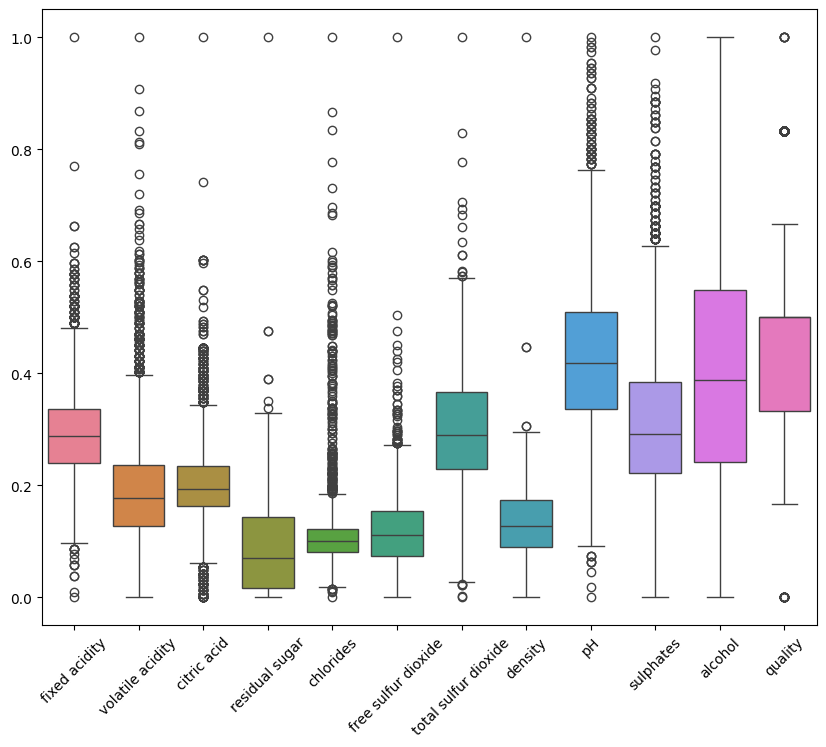

In [10]:
# Crear un boxplot para visualizar la distribución de todas las variables numéricas y detectar posibles Outliers

# Para crear solo un boxplot para todas las variables, primero debemos normalizar la escala

# Selecciona las columnas numéricas
num_columns = df0.select_dtypes(include=np.number)

#normalize values using min-max scaling
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(num_columns)

# Creamos un df con la data normalizada
df_normalized = pd.DataFrame(normalized_data, columns=num_columns.columns)

plt.figure(figsize=(10,8))
sns.boxplot(data= df_normalized)
plt.xticks(rotation=45)


plt.show()

**Decisión**: Al parecer, todas las variables excepto las dos últimas presentan una gran cantidad de Outliers, por lo que serán estudiadas.


In [11]:
# Determinar el número de filas que contienen valores atípicos para cada variable que necesita ser abordada
X_n = list(num_columns)[:-2]
# Calcular el percentil 25 en `X_n`
percentile25 = df1[X_n].quantile(0.25)

# Calcular el percentil 75 en `X_n`
percentile75 = df1[X_n].quantile(0.75)

# Calcular el rango intercuartil en `X_n`
iqr = percentile75 - percentile25

# Definir el límite superior e inferior para valores no atípicos en `X_n`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Límite inferior:", lower_limit)
print("Límite superior:", upper_limit)

# Identificar el subconjunto de datos que contiene valores atípicos en `X_n`
outliers = df1[(df1[X_n] > upper_limit) | (df1[X_n] < lower_limit)]

# Contar cuántas filas en los datos contienen valores atípicos en `X_n`
print("Número de filas en los datos que contienen valores atípicos en `X_n`:", len(outliers))


Límite inferior: fixed acidity            4.800000
volatile acidity         0.030000
citric acid              0.090000
residual sugar          -9.350000
chlorides                0.012500
free sulfur dioxide    -10.000000
total sulfur dioxide    16.000000
density                  0.985485
pH                       2.790000
sulphates                0.200000
dtype: float64
Límite superior: fixed acidity             8.800000
volatile acidity          0.510000
citric acid               0.570000
residual sugar           19.850000
chlorides                 0.072500
free sulfur dioxide      78.000000
total sulfur dioxide    256.000000
density                   1.001845
pH                        3.590000
sulphates                 0.760000
dtype: float64
Número de filas en los datos que contienen valores atípicos en `X_n`: 3961


##### Resolución de Outliers

**Decisión**: Dado que casi todas las filas presentan valores atípicos en alguna columna, no podemos simplemente eliminarlos. En su lugar, los valores atípicos serán reemplazados por el valor del percentil 90 o del percentil 10, según corresponda.


In [29]:
# Metodo de sima y cima

# Calcular el percentil 10
percentil_10 = df1[X_n].quantile(0.10)
# Calcular el percentil 90
percentil_90 = df1[X_n].quantile(0.90)
# Aplicar una función lambda para reemplazar los outliers con los umbrales definidos anteriormente
for col in X_n:    
    df1[col] = df1[col].apply(lambda x: (
        percentil_10[col] if x < percentil_10[col]
        else percentil_90[col] if x > percentil_90[col] 
        else x))
df1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.00000,3961.000000,3961.000000
mean,6.817054,0.272242,0.332315,5.643575,0.042958,34.306236,136.552764,0.993736,3.191659,0.48491,10.589358,5.854835
std,0.684197,0.073049,0.084972,4.177294,0.008987,13.663826,35.610333,0.002479,0.121354,0.08915,1.217076,0.890683
min,5.800000,0.170000,0.220000,1.200000,0.030000,15.000000,86.000000,0.990220,3.010000,0.36000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.41000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.48000,10.400000,6.000000
75%,7.300000,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.55000,11.400000,6.000000
max,8.000000,0.400000,0.490000,13.000000,0.058000,57.000000,195.000000,0.997800,3.390000,0.64000,14.200000,9.000000
